In [1]:
#import

In [2]:
from pandasql import sqldf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import io
import requests
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [3]:
#project csv

In [4]:
project_csv = pd.read_csv('../data/Headway Data.csv')
print(project_csv)

         CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID        DATE  ROUTE_ABBR  \
0          120211101             1      76447164  2021-11-01           7   
1          120211101             1      76447165  2021-11-01           7   
2          120211101             1      76447166  2021-11-01           7   
3          120211101             1      76447167  2021-11-01          50   
4          120211101             1      76447168  2021-11-01          50   
...              ...           ...           ...         ...         ...   
1981710    120221101             1      91057724  2022-11-01          50   
1981711    120221101             1      91057851  2022-11-01          50   
1981712    120221101             1      91057852  2022-11-01          50   
1981713    120221101             1      91057881  2022-11-01          56   
1981714    120221101             1      91057882  2022-11-01          56   

         BLOCK_ABBR  OPERATOR  TRIP_ID  OVERLOAD_ID ROUTE_DIRECTION_NAME  ...  \
0     

In [5]:
#project dataframe

In [6]:
project_csv_df = pd.DataFrame(project_csv)
project_csv_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,19.366666


In [7]:
#sql query

In [8]:
sql_df3 = 'SELECT DISTINCT(ROUTE_DIRECTION_NAME),ROUTE_ABBR, OPERATOR, AVG(ACTUAL_HDWY), AVG(DWELL_IN_MINS), ADHERENCE FROM project_csv_df WHERE ACTUAL_HDWY IS NOT NULL GROUP BY ROUTE_ABBR ORDER BY AVG(ADHERENCE) DESC'
sqldf(sql_df3, globals())
SQLDF = sqldf(sql_df3, globals())
SQLDF

,ROUTE_DIRECTION_NAME,ROUTE_ABBR,OPERATOR,AVG(ACTUAL_HDWY),AVG(DWELL_IN_MINS),ADHERENCE
0,FROM DOWNTOWN,23,1277,18.771640,3.954556,-4.366666
1,TO DOWNTOWN,22,1352,31.686608,4.281237,-1.050000
2,TO DOWNTOWN,7,2088,24.356800,6.167276,-2.000000
3,TO DOWNTOWN,56,1330,14.359610,3.684233,-2.033333
4,TO DOWNTOWN,3,1208,23.336195,2.862463,-0.200000
5,TO DOWNTOWN,50,664,20.521782,3.159561,-0.150000
6,FROM DOWNTOWN,52,1904,19.577399,3.722459,0.400000
7,TO DOWNTOWN,55,1716,14.082049,2.873893,-0.816666


In [9]:
#headway groupby

In [10]:
hdwy_gb = project_csv_df.groupby(['OPERATOR'],as_index = False)['HDWY_DEV'].sum()
hdwy_gb

,OPERATOR,HDWY_DEV
0,0,27.049975
1,30,-8.250001
2,85,-9.833334
3,86,-88.300006
4,93,12.816665
...,...,...
453,2622,-54.933463
454,2623,-75.050044
455,2624,60.749987
456,2630,-24.483389


# correlation matrix

In [11]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = SQLDF.corr()
corr.style.background_gradient(cmap='coolwarm')

,ROUTE_ABBR,OPERATOR,AVG(ACTUAL_HDWY),AVG(DWELL_IN_MINS),ADHERENCE
ROUTE_ABBR,1.000000,-0.116327,-0.664044,-0.455412,0.248172
OPERATOR,-0.116327,1.000000,-0.022675,0.564879,-0.025305
AVG(ACTUAL_HDWY),-0.664044,-0.022675,1.000000,0.423945,0.136444
AVG(DWELL_IN_MINS),-0.455412,0.564879,0.423945,1.000000,-0.376260
ADHERENCE,0.248172,-0.025305,0.136444,-0.376260,1.000000


# heat map

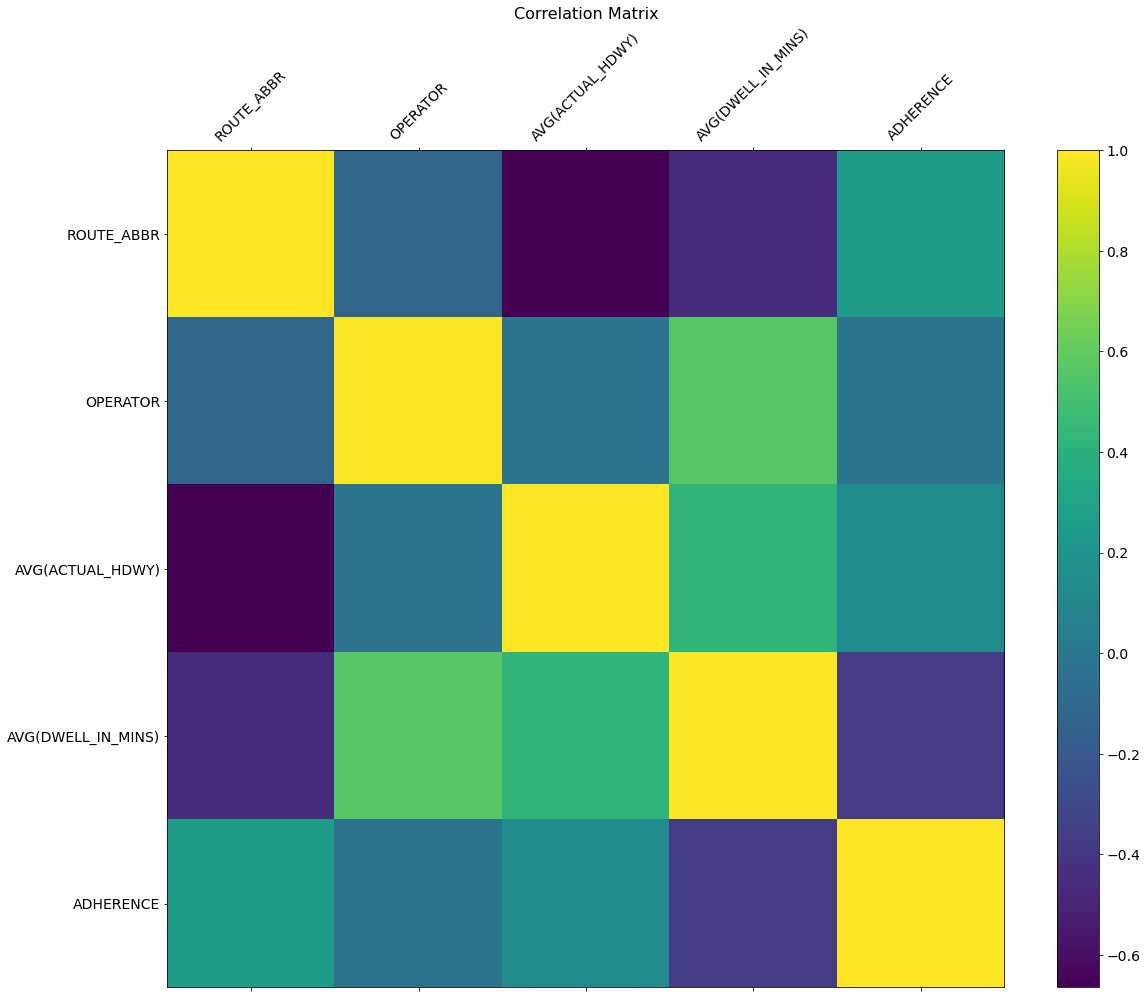

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(SQLDF.corr(), fignum=f.number)
plt.xticks(range(SQLDF.select_dtypes(['number']).shape[1]), SQLDF.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(SQLDF.select_dtypes(['number']).shape[1]), SQLDF.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [13]:
#drop df

In [14]:
drop_df = project_csv_df.drop(project_csv_df.columns[[0,1,2,3,5,7,10,11,12,13,14,21,22,23,24,25,26,27,28]], axis=1)
drop_df 

,ROUTE_ABBR,OPERATOR,OVERLOAD_ID,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,DWELL_IN_MINS
0,7,2088,0,TO DOWNTOWN,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,12.650000
1,7,2088,0,TO DOWNTOWN,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,0.000000
2,7,2088,0,TO DOWNTOWN,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,22.416666
3,50,2088,0,TO DOWNTOWN,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,5.766666
4,50,2088,0,TO DOWNTOWN,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1981710,50,2355,0,TO DOWNTOWN,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,1.016666
1981711,50,1880,0,TO DOWNTOWN,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,9.900000
1981712,50,1880,0,TO DOWNTOWN,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,0.000000
1981713,56,1922,0,TO DOWNTOWN,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,19.366666


In [15]:
sql_df2 = 'SELECT ROUTE_ABBR, OPERATOR, AVG(DWELL_IN_MINS) AS DWELL_IN_MINS, AVG(ACTUAL_HDWY) AS ACTUAL_HDWY, ROUTE_DIRECTION_NAME, AVG(ADHERENCE) AS AVG_ADHERENCE FROM drop_df WHERE DWELL_IN_MINS > 0 GROUP BY ROUTE_ABBR ORDER BY DWELL_IN_MINS DESC'
sqldf(sql_df2, globals())
question_6_1 = sqldf(sql_df2, globals())
question_6_1

,ROUTE_ABBR,OPERATOR,DWELL_IN_MINS,ACTUAL_HDWY,ROUTE_DIRECTION_NAME,AVG_ADHERENCE
0,7,2088,12.488823,24.492028,TO DOWNTOWN,-2.340081
1,22,1352,11.329733,31.045869,TO DOWNTOWN,-1.554772
2,3,1208,10.625327,25.042816,TO DOWNTOWN,-2.401820
3,23,1277,10.367496,18.343056,FROM DOWNTOWN,-1.749274
4,55,1716,9.790717,14.013538,TO DOWNTOWN,-2.401673
5,50,2088,9.782959,20.281728,TO DOWNTOWN,-2.762243
6,52,1904,8.875503,20.303822,FROM DOWNTOWN,-2.247529
7,56,1330,8.627085,14.182813,TO DOWNTOWN,-2.268928


In [16]:
sql_df3 = 'SELECT ROUTE_ABBR, OPERATOR, AVG(DWELL_IN_MINS) AS DWELL_IN_MINS, AVG(ACTUAL_HDWY) AS ACTUAL_HDWY, AVG(ROUTE_DIRECTION_NAME), AVG(ADHERENCE) AS AVG_ADHERENCE FROM drop_df WHERE DWELL_IN_MINS > 0 GROUP BY ROUTE_ABBR ORDER BY DWELL_IN_MINS DESC'
sqldf(sql_df3, globals())
question_6_2 = sqldf(sql_df3, globals())
question_6_2

,ROUTE_ABBR,OPERATOR,DWELL_IN_MINS,ACTUAL_HDWY,AVG(ROUTE_DIRECTION_NAME),AVG_ADHERENCE
0,7,2088,12.488823,24.492028,0.0,-2.340081
1,22,1352,11.329733,31.045869,0.0,-1.554772
2,3,1208,10.625327,25.042816,0.0,-2.401820
3,23,1277,10.367496,18.343056,0.0,-1.749274
4,55,1716,9.790717,14.013538,0.0,-2.401673
5,50,2088,9.782959,20.281728,0.0,-2.762243
6,52,1904,8.875503,20.303822,0.0,-2.247529
7,56,1330,8.627085,14.182813,0.0,-2.268928


In [17]:
sql_df4 = 'SELECT OVERLOAD_ID ,ROUTE_ABBR, AVG(DWELL_IN_MINS) AS DWELL_IN_MINS, AVG(ACTUAL_HDWY) AS ACTUAL_HDWY, AVG(ROUTE_DIRECTION_NAME), AVG(ADHERENCE) AS AVG_ADHERENCE FROM drop_df WHERE DWELL_IN_MINS > 0 GROUP BY ROUTE_ABBR ORDER BY DWELL_IN_MINS DESC'
sqldf(sql_df4, globals())
question_6_4 = sqldf(sql_df4, globals())
question_6_4

,OVERLOAD_ID,ROUTE_ABBR,DWELL_IN_MINS,ACTUAL_HDWY,AVG(ROUTE_DIRECTION_NAME),AVG_ADHERENCE
0,0,7,12.488823,24.492028,0.0,-2.340081
1,0,22,11.329733,31.045869,0.0,-1.554772
2,0,3,10.625327,25.042816,0.0,-2.401820
3,0,23,10.367496,18.343056,0.0,-1.749274
4,0,55,9.790717,14.013538,0.0,-2.401673
5,0,50,9.782959,20.281728,0.0,-2.762243
6,0,52,8.875503,20.303822,0.0,-2.247529
7,0,56,8.627085,14.182813,0.0,-2.268928


In [18]:
rename_df = question_6_1.rename(columns= {'ROUTE_ABBR': 'ROUTE ABBR', 'DWELL_IN_MINS': 'AVG DWELL IN MINS', 'AVG_ADHERENCE': 'AVG ADHERENCE', 'ACTUAL_HDWY' : 'AVG ACTUAL HDWY'})
rename_df

,ROUTE ABBR,OPERATOR,AVG DWELL IN MINS,AVG ACTUAL HDWY,ROUTE_DIRECTION_NAME,AVG ADHERENCE
0,7,2088,12.488823,24.492028,TO DOWNTOWN,-2.340081
1,22,1352,11.329733,31.045869,TO DOWNTOWN,-1.554772
2,3,1208,10.625327,25.042816,TO DOWNTOWN,-2.401820
3,23,1277,10.367496,18.343056,FROM DOWNTOWN,-1.749274
4,55,1716,9.790717,14.013538,TO DOWNTOWN,-2.401673
5,50,2088,9.782959,20.281728,TO DOWNTOWN,-2.762243
6,52,1904,8.875503,20.303822,FROM DOWNTOWN,-2.247529
7,56,1330,8.627085,14.182813,TO DOWNTOWN,-2.268928


# 3d graph

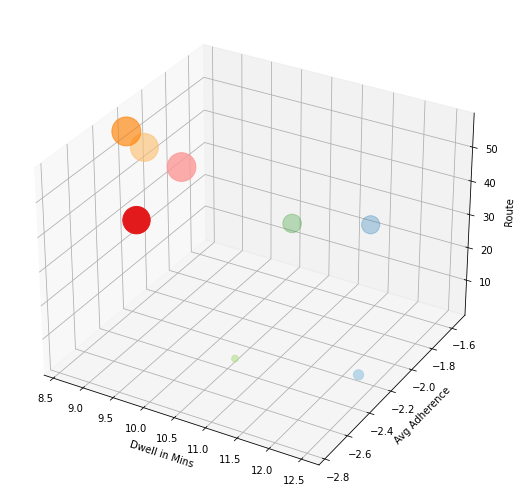

In [30]:
fig = plt.figure(figsize= (16,9))

my_cmap = sns.color_palette('Paired', as_cmap=True)

ax = fig.add_subplot(111, projection= '3d')
x= rename_df['AVG DWELL IN MINS']
y= rename_df['AVG ADHERENCE']
z= rename_df['ROUTE ABBR']
colors=sns.color_palette('Paired',8)


ax.set_xlabel('Dwell in Mins')
ax.set_ylabel('Avg Adherence')
ax.set_zlabel('Route')


cb = ax.scatter3D(x, y, z, s=z*15, c=colors)

plt.show;

In [20]:
#describe

In [21]:
describe= rename_df.describe()
describe

,ROUTE ABBR,OPERATOR,AVG DWELL IN MINS,AVG ACTUAL HDWY,AVG ADHERENCE
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,33.500000,1620.375000,10.235955,20.963209,-2.215790
std,22.226111,372.488902,1.269613,5.766800,0.385752
min,3.000000,1208.000000,8.627085,14.013538,-2.762243
25%,18.250000,1316.750000,9.556095,17.302995,-2.401710
50%,36.500000,1534.000000,10.079106,20.292775,-2.304504
75%,52.750000,1950.000000,10.801429,24.629725,-2.122966
max,56.000000,2088.000000,12.488823,31.045869,-1.554772


# route_graph

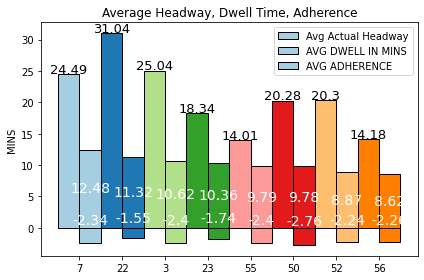

In [34]:
labels = [7, 22, 3, 23, 55, 50, 52, 56]
AVG_ACTUAL_HDWY = [24.49, 31.04, 25.04, 18.34, 14.01, 20.28, 20.30, 14.18]
AVG_DWELL_IN_MINS = [12.48, 11.32, 10.62, 10.36, 9.79, 9.78, 8.87, 8.62]
AVG_ADHERENCE = [-2.34, -1.55, -2.40, -1.74, -2.40, -2.76, -2.24, -2.26]

x = np.arange(len(labels))
width = 0.5

colors=sns.color_palette('Paired',8)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, AVG_ACTUAL_HDWY, width, label= 'Avg Actual Headway', color = colors, edgecolor= 'black')
rects2 = ax.bar(x + width/2, AVG_DWELL_IN_MINS, width, label= 'AVG DWELL IN MINS', color = colors, edgecolor= 'black')
rects3 = ax.bar(x + width/2, AVG_ADHERENCE, width, label= 'AVG ADHERENCE', color = colors, edgecolor= 'black')


ax.set_ylabel('MINS')
ax.set_title('Average Headway, Dwell Time, Adherence')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, label_type='edge', color='black', padding= -2, fontsize=13)
ax.bar_label(rects2, label_type='center', color ='white', fontsize= 14)
ax.bar_label(rects3, label_type='center', color ='white', padding = -15, fontsize=14)

fig.tight_layout()
plt.show()

# direction graph

<Figure size 2160x1080 with 0 Axes>

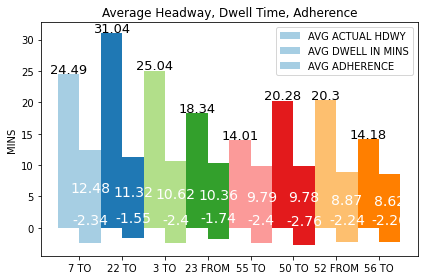

In [23]:
f = plt.figure(figsize=(30, 15))

labels = ['7 TO', '22 TO', '3 TO', '23 FROM', '55 TO', '50 TO', '52 FROM', '56 TO']
AVG_ACTUAL_HDWY = [24.49, 31.04, 25.04, 18.34, 14.01, 20.28, 20.30, 14.18]
AVG_DWELL_IN_MINS = [12.48, 11.32, 10.62, 10.36, 9.79, 9.78, 8.87, 8.62]
AVG_ADHERENCE = [-2.34, -1.55, -2.40, -1.74, -2.40, -2.76, -2.24, -2.26]

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()

colors = sns.mpl_palette("Paired", 8)

rects1 = ax.bar(x - width/2, AVG_ACTUAL_HDWY, width, label= 'AVG ACTUAL HDWY', color = colors)
rects2 = ax.bar(x + width/2, AVG_DWELL_IN_MINS, width, label= 'AVG DWELL IN MINS', color = colors)
rects3 = ax.bar(x + width/2, AVG_ADHERENCE, width, label= 'AVG ADHERENCE', color = colors)

ax.set_ylabel('MINS')
ax.set_title('Average Headway, Dwell Time, Adherence')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, label_type='edge', color='black', padding=-2, fontsize=13)
ax.bar_label(rects2, label_type='center', color ='white', fontsize= 14)
ax.bar_label(rects3, label_type='center', color ='white', padding = -15, fontsize=14)

fig.tight_layout()
plt.show;

In [24]:
#direction_groupby

In [25]:
direction = pd.DataFrame({
    'Direction': ['To', 'To', 'To', 'From', 'To', 'To', 'From', 'To'],
    'AVG_ACTUAL_HDWY': [24.49, 31.04, 25.04, 18.34, 14.01, 20.28, 20.30, 14.18],
    'AVG_DWELL_IN_MINS' : [12.48, 11.32, 10.62, 10.36, 9.79, 9.78, 8.87, 8.62],
    'AVG_ADHERENCE' : [-2.34, -1.55, -2.40, -1.74, -2.40, -2.76, -2.24, -2.26]
})
direction

direction.groupby('Direction', as_index=True)[['AVG_ACTUAL_HDWY', 'AVG_DWELL_IN_MINS', 'AVG_ADHERENCE']].mean()


,AVG_ACTUAL_HDWY,AVG_DWELL_IN_MINS,AVG_ADHERENCE
Direction,,,
From,19.320000,9.615,-1.990
To,21.506667,10.435,-2.285


# ACTUAL DIRECTION GRAPH

<Figure size 2160x1080 with 0 Axes>

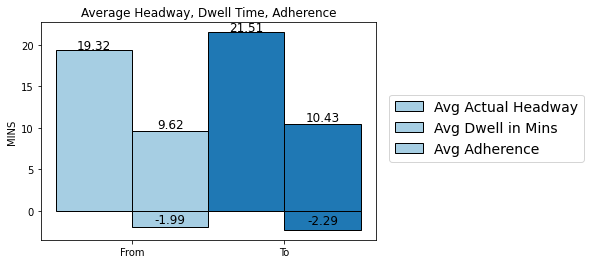

In [35]:
f = plt.figure(figsize=(30, 15))



labels = ['From', 'To']
AVG_ACTUAL_HDWY = [19.32, 21.51]
AVG_DWELL_IN_MINS = [9.62, 10.43]
AVG_ADHERENCE = [-1.99, -2.29]

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()
colors=sns.color_palette('Paired')[0:5]
rects1 = ax.bar(x - width/2, AVG_ACTUAL_HDWY, width, label= 'Avg Actual Headway', color = colors, edgecolor = 'black')
rects2 = ax.bar(x + width/2, AVG_DWELL_IN_MINS, width, label= 'Avg Dwell in Mins', color = colors, edgecolor = 'black')
rects3 = ax.bar(x + width/2, AVG_ADHERENCE, width, label= 'Avg Adherence', color = colors, edgecolor = 'black')


ax.set_ylabel('MINS')
ax.set_title('Average Headway, Dwell Time, Adherence')
ax.set_xticks(x, labels)
ax.legend(
         fontsize = 14,
         bbox_to_anchor = (1.02, 0.7))

ax.bar_label(rects1, label_type='edge', color='black', padding=-2, fontsize=12)
ax.bar_label(rects2, label_type='edge', color ='black', fontsize= 12)
ax.bar_label(rects3, label_type='center', color ='black', fontsize=12)

plt.show;

# AVG actual hdwy pie

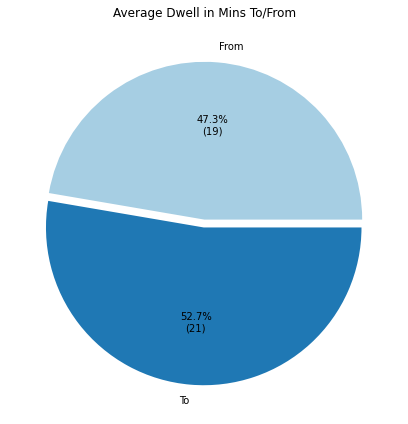

In [51]:
x= np.array([19.32, 21.52])
mylabels = ['From', 'To']


colors= sns.color_palette('Paired')

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(6, 6))
explode = (0, 0.05)

ax.pie(x, explode = explode, labels = mylabels, colors = colors, autopct=lambda pct: func(pct, x))
ax.set_title('Average Dwell in Mins To/From')
plt.tight_layout()


plt.show()

# AVG Dwell in Mins PIE

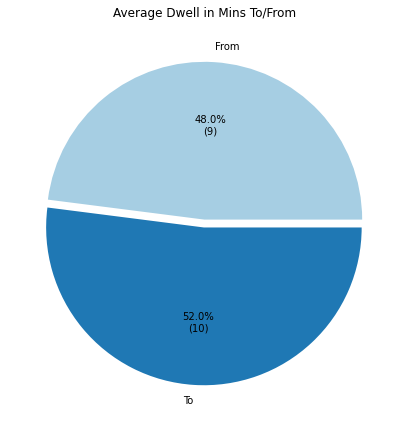

In [52]:
x= np.array([9.62, 10.43 ])
mylabels = ['From', 'To']

colors= sns.color_palette('Paired')

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(6, 6))
explode = (0, 0.05)

ax.pie(x, explode = explode, labels = mylabels, colors = colors, autopct=lambda pct: func(pct, x))
ax.set_title('Average Dwell in Mins To/From')
plt.tight_layout()


plt.show()

# Adherence PIE

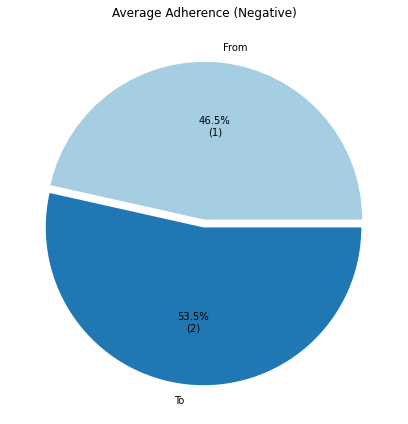

In [53]:
x= np.array([1.99, 2.29 ])
mylabels = ['From', 'To']

colors= sns.color_palette('Paired')

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(6, 6))

explode = (0, 0.05)

ax.pie(x, explode = explode, labels = mylabels, colors = colors, autopct=lambda pct: func(pct, x))
ax.set_title('Average Adherence (Negative)')
plt.tight_layout()

plt.show()